<a href="https://colab.research.google.com/github/chin0104/DPDM2023/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from sklearn import datasets #import the SKlearn package to load the example dataset
iris = datasets.load_iris() #load iris dataset

In [9]:
test_data_0 = iris['data'][:5,:]
test_data_1 = iris['data'][50:55,:]
test_data_2 = iris['data'][100:105,:]

train_data_0 = iris['data'][5:50,:]
train_data_1 = iris['data'][55:100,:]
train_data_2 = iris['data'][105:,:]

test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]

test_data = [test_data_0, test_data_1, test_data_2]
test_labels = [test_label_0, test_label_1, test_label_2]
train_data = [train_data_0, train_data_1, train_data_2]
train_labels = [train_label_0, train_label_1, train_label_2]

In [10]:
def minsort(dist):
  for m in range(k):
    min_distance = dist[m]
    min_index = m
    for n in range(m+1, len(dist)):
      if dist[n][1] < min_distance[1]:
        min_distance = dist[n]
        min_index = n
    dist[m], dist[min_index] = dist[min_index], dist[m]
  return dist

In [11]:
def eud(test_data,train_data,i,train_label):
  dist = []
  for j in range(len(train_data)):
    d = (sum((test_data[i] - train_data[j]) ** 2))**(1/2)
    dist.append((train_label[j], d))
  return dist

In [12]:
def KNN(train_data, train_label, test_data, k):
    predictions = []

    for i in range(len(test_data)):

        dist = eud(test_data,train_data,i,train_label)
        dist = minsort(dist)
        votes = {}
        for n in range(k):
            label = dist[n][0]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1

        vmax = max(votes, key=votes.get)
        predictions.append(vmax)

    return predictions

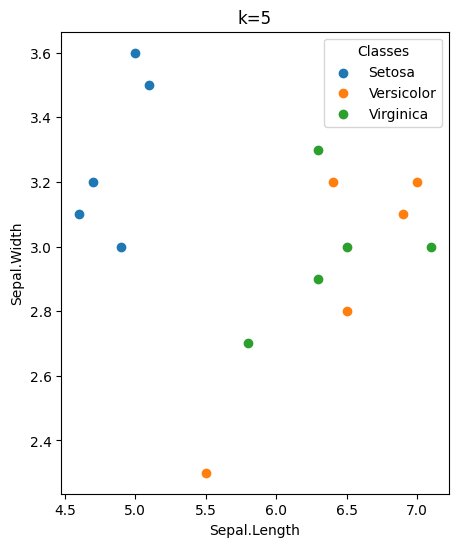

In [13]:
k = 5
predictions = []
for i in range(len(test_data)):
    predictions.extend(KNN(train_data[i], train_labels[i], test_data[i], k))
plt.figure(figsize=(5, 6))

plt.scatter(test_data[0][:, 0], test_data[0][:, 1], label=f'Setosa')
plt.scatter(test_data[1][:, 0], test_data[1][:, 1], label=f'Versicolor')
plt.scatter(test_data[2][:, 0], test_data[2][:, 1], label=f'Virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend(title='Classes')

plt.title('k=5')
plt.show()